In [1]:
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [3]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [4]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [5]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [6]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 1s 868us/step - loss: 0.6991 - accuracy: 0.7698 - val_loss: 0.4995 - val_accuracy: 0.8346
Epoch 2/30
1719/1719 [==============================] - 1s 803us/step - loss: 0.4854 - accuracy: 0.8296 - val_loss: 0.4396 - val_accuracy: 0.8522
Epoch 3/30
1719/1719 [==============================] - 1s 792us/step - loss: 0.4422 - accuracy: 0.8447 - val_loss: 0.4265 - val_accuracy: 0.8538
Epoch 4/30
1719/1719 [==============================] - 1s 796us/step - loss: 0.4160 - accuracy: 0.8537 - val_loss: 0.4069 - val_accuracy: 0.8586
Epoch 5/30
1719/1719 [==============================] - 1s 791us/step - loss: 0.3945 - accuracy: 0.8604 - val_loss: 0.4205 - val_accuracy: 0.8560
Epoch 6/30
1719/1719 [==============================] - 1s 792us/step - loss: 0.3798 - accuracy: 0.8657 - val_loss: 0.3717 - val_accuracy: 0.8700
Epoch 7/30
1719/1719 [==============================] - 1s 798us/step - loss: 0.3669 - accuracy: 0.8701 - val_loss: 0.3849 -

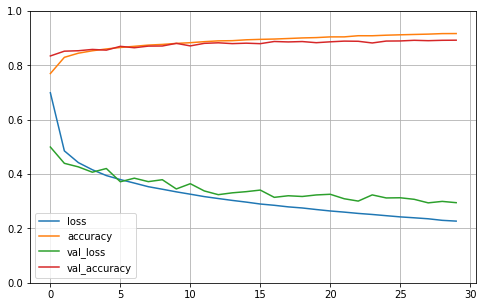

In [7]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [8]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5446 - accuracy: 0.8109 - val_loss: 0.4115 - val_accuracy: 0.8578
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4221 - accuracy: 0.8514 - val_loss: 0.3702 - val_accuracy: 0.8714
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3865 - accuracy: 0.8629 - val_loss: 0.3557 - val_accuracy: 0.8710
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3626 - accuracy: 0.8705 - val_loss: 0.3412 - val_accuracy: 0.8806
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3441 - accuracy: 0.8755 - val_loss: 0.3340 - val_accuracy: 0.8802
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3312 - accuracy: 0.8802 - val_loss: 0.3251 - val_accuracy: 0.8844
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3157 - accuracy: 0.8850 - val_loss: 0.3235 - val_accuracy:

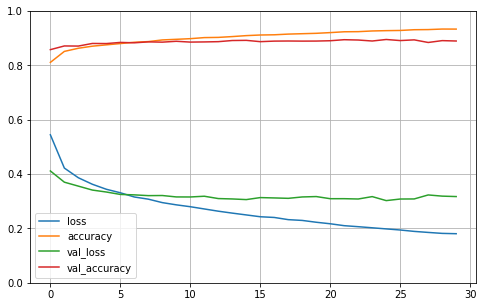

In [9]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dense_5 (Dense)              (None, 10)               